Copyright (c) 2019 [윤기태]

https://github.com/yoonkt200/python-data-analysis

[MIT License](https://github.com/yoonkt200/python-data-analysis/blob/master/LICENSE.txt)

# (가제) 파이썬 데이터 분석

-----

# 2.1) 나무위키의 최신 업로드 분석

### 바로가기

- [<Step1. 크롤링> : 크롤링으로 웹 데이터 가져오기](#<Step1.-크롤링>-:-크롤링으로-웹-데이터-가져오기)
    - [BeautifulSoup을 이용한 웹 크롤링]
    - [나무위키 최근변경 데이터 크롤링]
- [<Step2. 전처리> : 형태소 추출](#<Step2.-전처리>-:-형태소-추출)
    - [텍스트 데이터 전처리]
    - [말뭉치 만들기]
    - [konlpy를 이용한 형태소 추출]
    - [키워드 가다듬기]
- [<Step3. 시각화> : 워드 클라우드 기법](#<Step3.-시각화>-:-워드-클라우드-기법)
    - [pytagcloud 사용하기]
    - [나무위키 키워드 시각화]

-----

In [1]:
# -*- coding: utf-8 -*-

%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# <Step1. 크롤링> : 크롤링으로 웹 데이터 가져오기

### [BeautifulSoup을 이용한 웹 크롤링]

- 아래 코드 실행을 위해, anaconda prompt 혹은 터미널(cmd)에서 아래와 같은 패키지들을 설치해 줍니다.
    - (env_name) `pip install beautifulsoup4`
    - (env_name) `pip install lxml`

##### 페이지 리스트 가져오기

In [2]:
import requests
from bs4 import BeautifulSoup
import re

source_url = "https://namu.wiki/RecentChanges"

req = requests.get(source_url)
html = req.content
soup = BeautifulSoup(html, 'lxml')
contents_table = soup.find(name="table", attrs={"class":"table-hover"})
table_body = contents_table.find(name="tbody")
table_rows = table_body.find_all(name="tr")

In [3]:
page_url_base = "https://namu.wiki"
page_urls = []
for index in range(0, len(table_rows)):
    first_td = table_rows[index].find_all('td')[0]
    td_url = first_td.find_all('a')
    if len(td_url) > 0:
        page_url = page_url_base + td_url[0].get('href')
        page_urls.append(page_url)

# 중복 url 제거
page_urls = list(set(page_urls))

-----

##### 페이지내 텍스트 구조 확인

In [4]:
req = requests.get(page_urls[0])
html = req.content
soup = BeautifulSoup(html, 'lxml')
title = soup.find(name="h1", attrs={"class":"title"})
category = soup.find(name="div", attrs={"class":"wiki-category"})
content_clearfix = soup.find(name="div", attrs={"class":"wiki-content clearfix"})
print(title.text)
print(category.text)
print(content_clearfix.text)


야마구치 마호 자택 습격 사건


분류

2018년 사건
헤이세이 시대/사건사고




   관련 문서: 야마구치 마호, NGT48주의. 사건·사고 관련 내용을 설명합니다. 이 문서는 실제로 일어난 사건·사고의 자세한 내용과 설명을 포함하고 있습니다. 특정 사건사고 문서는 유머성 서술과 비하적인 표현이 제한되며, 사실관계를 작성할 때에는 출처를 반드시 표시해야 합니다.1. 개요2. 사건 전개2.1. 2018년 12월: 사건 발생2.2. 2019년 1월 8일~9일 아침: 폭로2.3. 2019년 1월 10일: 야마구치의 사과와 운영의 대응2.4. 2019년 1월 12일: 주간문춘의 보도2.5. 2019년 1월 14일: NGT48 스텝 교체 및 사과 기자회견2.6. 2019년 1월 15일 이후: 묵묵부답2.7. 2019년 3월 21일: 조사 보고서 발표2.8. 2019년 3월 22일: 기자회견 및 마호의 폭로3. 일부 NGT48 멤버의 사건 교사 의혹4. 수면 위로 드러난 팀 내 불화5. 반응5.1. 48그룹 전 · 현직 멤버들의 반응5.2. 대중들의 반응5.3. 니가타 현지 스폰서의 반응5.4. 해외 언론1. 개요[편집]일본의 아이돌 그룹 NGT48의 멤버 야마구치 마호가 자택에서 남성 2명에게 습격을 당한 사건. 단순한 극성 팬들의 아이돌 스토킹 사건이 아니라, 같은 그룹 멤버의 개인정보 유출 및 범행 교사가 이루어졌고 운영측의 사건 무마 의혹이 겹친 복잡한 사건이다. 간략 정리2. 사건 전개[편집]2.1. 2018년 12월: 사건 발생[편집]2018년 12월 8일, 남성 2명이 니가타시에 있는 야마구치의 자택[1] 현관에서 야마구치의 안면부를 붙잡으며 방으로 들이미는 사건이 있었다.# 야마구치가 악수회를 마치고 귀가하던 중 습격을 당했다고 한다. 해당 남성들은 각각 20대의 무직과 대학생인 친구사이로서, 폭행 등의 혐의로 조사받았으나 '야마구치와 이야기를 하고 싶었을 뿐인데 일이 이렇게 커질 줄은 몰랐다'고 진술하였으며, 현재 불기소 처분을 받고 석방된 상태

-----

### [나무위키 최근변경 데이터 크롤링]

In [5]:
columns = ['title', 'category', 'content_text']
df = pd.DataFrame(columns=columns)

for page_url in page_urls:
    req = requests.get(page_url)
    html = req.content
    soup = BeautifulSoup(html, 'lxml')
    title = soup.find(name="h1", attrs={"class":"title"})
    category = soup.find(name="div", attrs={"class":"wiki-category"})
    content_clearfix = soup.find(name="div", attrs={"class":"wiki-content clearfix"})
    
    
    if title is not None:
        row_title = title.text.replace("\n", " ")
    else:
        row_title = ""
    
    if content_clearfix is not None:
        row_content_clearfix = content_clearfix.text.replace("\n", " ")
    else:
        row_content_clearfix = ""
        
    # 카테고리 데이터는 '분류'를 별도로 제거
    if category is not None:
        row_category = category.text.replace("\n", " ").replace("분류", "")
    else:
        row_category = ""
    
    row = [row_title, row_category, row_content_clearfix]
    series = pd.Series(row, index=df.columns)
    df = df.append(series, ignore_index=True)

In [6]:
df.head(5)

,title,category,content_text
0,야마구치 마호 자택 습격 사건,2018년 사건 헤이세이 시대/사건사고,"관련 문서: 야마구치 마호, NGT48주의. 사건·사고 관련 내용을 설명합..."
1,세계관 최강자/캐릭터,클리셰 유형별 캐릭터,가입 후 15일이 지나야 편집 가능한 문서입니다. 상위 문서: 세계관 ...
2,전생,동음이의어/ㅈ,1. 개요2. 前生3. 轉生3.1. 전생을 소재로 한 작품1. 개요[편집]환생과...
3,싱가포르 공무원,싱가포르 공무원,"공무원들의 채용 대비 10% 가량이 계속 자리에서 물갈이가 되는 중이며, 본인/..."
4,파이널 판타지 14/종족,파이널 판타지 14,로그인 후 편집 가능한 문서입니다.상위 문서: 파이널 판타지 14관련 문서...


-----

# <Step2. 전처리> : 형태소 추출

### [텍스트 데이터 전처리]

In [7]:
# 텍스트 정제 함수 : 한글 이외의 문자는 전부 제거
def text_cleaning(text):
    hangul = re.compile('[^ ㄱ-ㅣ가-힣]+') # 한글의 정규표현식
    result = hangul.sub('', text)
    return result

In [8]:
print(text_cleaning(content_clearfix.text))

이 파일은 나무위키에서 제한된 한도 안에서 쓰입니다본 이미지는 퍼블릭 도메인 혹은 자유이용 저작물이 아닌 독점적 저작권이 존재하는 이미지입니다 나무위키는 본 이미지를 제한된 한도 안에서 이용합니다 다음과 같은 사항을 참조하시기 바랍니다권리자는 해당 이미지가 나무위키에 게시되어 권리자의 정당한 권리를 침해한다고 여겨진다면 문의 게시판에 문의해 주세요해당 이미지를 업로드한 사용자는 자신의 행위에 대한 법적 책임이 부과될 수 있음을 숙지해주세요 기본 정보 이미지 설명 기본 정보편집출처야인시대날짜년 월 일  저작자 저작권기타년 월 일 김두한의 장의차 이미지 설명편집이미지의 자세한 설명을 적어 주세요


In [9]:
df['title'] = df['title'].apply(lambda x: text_cleaning(x))
df['category'] = df['category'].apply(lambda x: text_cleaning(x))
df['content_text'] = df['content_text'].apply(lambda x: text_cleaning(x))
df.head(5)

,title,category,content_text
0,야마구치 마호 자택 습격 사건,년 사건 헤이세이 시대사건사고,관련 문서 야마구치 마호 주의 사건사고 관련 내용을 설명합니다 이 문서는 실...
1,세계관 최강자캐릭터,클리셰 유형별 캐릭터,가입 후 일이 지나야 편집 가능한 문서입니다 상위 문서 세계관 최강자 관...
2,전생,동음이의어ㅈ,개요 전생을 소재로 한 작품 개요편집환생과 관련된 두 가지 말 일단 번 이...
3,싱가포르 공무원,싱가포르 공무원,공무원들의 채용 대비 가량이 계속 자리에서 물갈이가 되는 중이며 본인배우자 미...
4,파이널 판타지 종족,파이널 판타지,로그인 후 편집 가능한 문서입니다상위 문서 파이널 판타지 관련 문서 파이널 ...


-----

### [말뭉치 만들기]

In [10]:
title_corpus = "".join(df['title'].tolist())
category_corpus = "".join(df['category'].tolist())
content_corpus = "".join(df['content_text'].tolist())
print(title_corpus)

 야마구치 마호 자택 습격 사건  세계관 최강자캐릭터  전생  싱가포르 공무원  파이널 판타지 종족  이치로 신지  파일  소니 사이버샷  말뫼    블라디미르  서울시립대학교학부  마인크래프트자바 에디션버전 목록  유니스  브롤스타즈게임 모드보스전  자유행성동맹군 통합작전본부    무기  격사블레이드 앤 소울  도쿠가와 이에야스 시리즈  사자원숭이  덤보영화  블레이드 앤 소울  어벤져스 엔드게임개봉 전 정보    외질혜  마피아직업  폭  손나은  망가쇼미  문재인 정부평가안보국방  야인시대  루이즈 프랑소와즈 르 블랑 드 라 발리에르  배달앱  궈  형 전기 기관차  페퍼포그  박미희  잇섭     프렌즈레이싱  이니셜등장차량  에미  수호수  엘인피니트  이소윤  닥터 최태수등장인물  고양 버스   팬텀 건담  대구 칠성시장 기관단총 노출 논란   그녀 리얼 걸  문재인 정부평가정치  최대현  세계 종언의 세계록  함대 컬렉션업데이트 내역년월 일  즉사기  티어밀리스 그레 포르트제  화상질병    춘천시 시내버스  아메무라 라무다  사사키 코토코   인베이더  마이크로닷  고스트 건담  김대겸     워 썬더지상 병기이탈리아 트리경전차  트수  서울 버스   적토마  매큔라이샤워 표기법  파일띵    영웅    넥타이  슈퍼로봇대전 시리즈역대 사기유닛  노무현별명  파일 


-----

### [konlpy를 이용한 형태소 추출]

- 아래 코드 실행을 위해, anaconda prompt 혹은 터미널(cmd)에서 아래와 같은 패키지들을 설치해 줍니다.
- 아래의 방법으로 설치해도 실행되지 않는다면, http://konlpy.org/ko/latest/install/ 를 참고하세요.
    - Mac OS, Linux
        - 1. Java SDK를 설치합니다.
        - 2. 아래와 같은 파이썬 패키지를 설치합니다.
            - (env_name) `pip install konlpy`
            - (env_name) `pip install jpype1`
            - (env_name) `pip install Jpype1-py3`
    - windows
        - ???

In [11]:
from konlpy.tag import Twitter
from collections import Counter

nouns_tagger = Twitter()
nouns = nouns_tagger.nouns(content_corpus)
count = Counter(nouns)

In [12]:
count

Counter({'관련': 297,
         '문서': 244,
         '야마구치': 63,
         '마호': 16,
         '주의': 75,
         '사건': 276,
         '사고': 61,
         '내용': 199,
         '설명': 145,
         '이': 1350,
         '실제': 229,
         '포함': 159,
         '특정': 36,
         '유머': 1,
         '서술': 35,
         '적': 431,
         '표현': 56,
         '제한': 52,
         '사실관계': 4,
         '작성': 27,
         '때': 1089,
         '출처': 29,
         '반드시': 32,
         '표시': 38,
         '개요': 114,
         '전개': 24,
         '년': 1891,
         '월': 1550,
         '발생': 90,
         '일일': 13,
         '아침': 13,
         '폭로': 16,
         '일': 1140,
         '사과': 40,
         '운영': 156,
         '대응': 89,
         '주간': 17,
         '문': 54,
         '보도': 40,
         '스텝': 3,
         '교체': 31,
         '및': 344,
         '기자회견': 21,
         '이후': 519,
         '묵묵': 2,
         '조사': 124,
         '보고서': 12,
         '발표': 71,
         '마': 104,
         '호의': 15,
         '일부': 121,
         '멤

-----

### [키워드 가다듬기]

##### 한글자 키워드 제거

In [13]:
# 한글자 키워드 제거
remove_char_counter = Counter({x : count[x] for x in count if len(x) > 1})
print(remove_char_counter)

Counter({'편집': 1208, '때문': 1085, '경우': 1010, '무기': 882, '능력': 753, '정도': 680, '공격': 671, '속도': 659, '사용': 649, '마피아': 619, '발사': 557, '사람': 553, '다른': 537, '이후': 519, '직업': 504, '자신': 463, '게임': 450, '사실': 448, '치명': 432, '최강': 413, '등장': 410, '이름': 405, '시리즈': 391, '탄수': 375, '모습': 363, '다만': 350, '하나': 330, '시간': 328, '피해': 325, '현재': 323, '존재': 320, '문제': 320, '캐릭터': 316, '이상': 314, '가지': 311, '상태': 308, '또한': 305, '가장': 303, '위해': 299, '관련': 297, '자체': 297, '추가': 293, '생각': 291, '데미지': 291, '모든': 285, '멤버': 283, '매우': 280, '사건': 276, '상황': 271, '모두': 267, '상대': 264, '대한': 264, '유닛': 261, '시민': 260, '학과': 256, '기동': 255, '성능': 252, '유저': 251, '스킬': 250, '업데이트': 249, '거의': 247, '본인': 245, '문서': 244, '한국': 240, '종족': 240, '플레이어': 239, '보스': 238, '수준': 232, '마법': 230, '실제': 229, '화상': 229, '인간': 221, '효과': 219, '평가': 216, '사기': 212, '대상': 212, '시작': 210, '다시': 209, '영상': 208, '당시': 208, '표기': 207, '병기': 205, '참고': 201, '발동': 201, '기준': 200, '내용': 199, '역시': 199, '기본': 194, '해당': 193, '

-----

##### 불용어 제거

In [14]:
# 한국어 약식 불용어사전 예시 (https://www.ranks.nl/stopwords/korean)
korean_stopwords_path = "../data/korean_stopwords.txt"

with open(korean_stopwords_path) as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]
print(stopwords[:10])

['아', '휴', '아이구', '아이쿠', '아이고', '어', '나', '우리', '저희', '따라']


In [15]:
# 나무위키 페이지에 맞는 불용어 추가하기
namu_wiki_stopwords = ['상위', '문서', '내용', '누설', '아래', '해당', '설명', '표기', '추가', '모든', '사용', '매우', '가장'
                       '줄거리', '요소', '상황', '편집', '틀', '경우', '때문', '모습', '정도', '이후', '사실', '생각', '인물', 
                       '이름', '년월']
for stopword in namu_wiki_stopwords:
    stopwords.append(stopword)

In [16]:
# 불용어 제거
remove_char_counter = Counter({x : remove_char_counter[x] for x in count if x not in stopwords})
print(remove_char_counter)

Counter({'무기': 882, '능력': 753, '공격': 671, '속도': 659, '마피아': 619, '발사': 557, '사람': 553, '직업': 504, '게임': 450, '치명': 432, '최강': 413, '등장': 410, '시리즈': 391, '탄수': 375, '피해': 325, '현재': 323, '존재': 320, '문제': 320, '캐릭터': 316, '가지': 311, '상태': 308, '가장': 303, '위해': 299, '관련': 297, '자체': 297, '데미지': 291, '멤버': 283, '사건': 276, '상대': 264, '대한': 264, '유닛': 261, '시민': 260, '학과': 256, '기동': 255, '성능': 252, '유저': 251, '스킬': 250, '업데이트': 249, '본인': 245, '한국': 240, '종족': 240, '플레이어': 239, '보스': 238, '수준': 232, '마법': 230, '실제': 229, '화상': 229, '인간': 221, '효과': 219, '평가': 216, '사기': 212, '대상': 212, '시작': 210, '다시': 209, '영상': 208, '당시': 208, '병기': 205, '참고': 201, '발동': 201, '기준': 200, '역시': 199, '기본': 194, '대해': 188, '기체': 188, '그냥': 184, '편이': 183, '의사': 183, '방어': 180, '기술': 178, '세계': 176, '활동': 176, '이유': 176, '제외': 175, '투표': 175, '공개': 174, '통해': 174, '무게': 174, '대부분': 172, '그대로': 171, '대미지': 170, '이기': 169, '부분': 167, '버전': 166, '교주': 165, '대통령': 163, '이용': 161, '포함': 159, '운영': 156, '기사': 156, 

-----

# <Step3. 시각화> : 워드 클라우드 기법

### [pytagcloud 사용하기]

- 아래 코드 실행을 위해, anaconda prompt 혹은 터미널(cmd)에서 아래와 같은 패키지들을 설치해 줍니다.
    - (env_name) `pip install pytagcloud pygame simplejson`
    - (env_name) `pip install webbrowser`
- 그리고 아래와 같은 경로에 한글 폰트(예: NanumBarunGothic.ttf) 파일을 옮깁니다.
    - Mac OS : /anaconda/envs/{env_name}/lib/python3.7/site-packages/pytagcloud/fonts
    - Windosw OS : C:\Users\USER\Anaconda3\envs\pc37 (env_name) \Lib\site-packages\pytagcloud\fonts
- 파일을 옮긴 후, 파이썬 가상환경을 재실행 하여 주피터를 다시 실행해줍니다. 그래도 아래의 코드가 실행되지 않는 경우는 다음과 같은 작업을 수행합니다.
    - 위의 경로에서 font.json 파일을 편집합니다.
    - 아래와 같은 코드를 추가합니다.
    - {
                "name": "NanumGothic",
                "ttf": "NanumGothic.ttf",
                "web": "http://fonts.googleapis.com/css?family=Nanum+Gothic"
        },

In [17]:
import random
import pytagcloud
import webbrowser

ranked_tags = remove_char_counter.most_common(40)
taglist = pytagcloud.make_tags(ranked_tags, maxsize=80)
pytagcloud.create_tag_image(taglist, 'wordcloud.jpg', size=(900, 600), fontname='NanumGothic', rectangular=False)

pygame 1.9.4
Hello from the pygame community. https://www.pygame.org/contribute.html


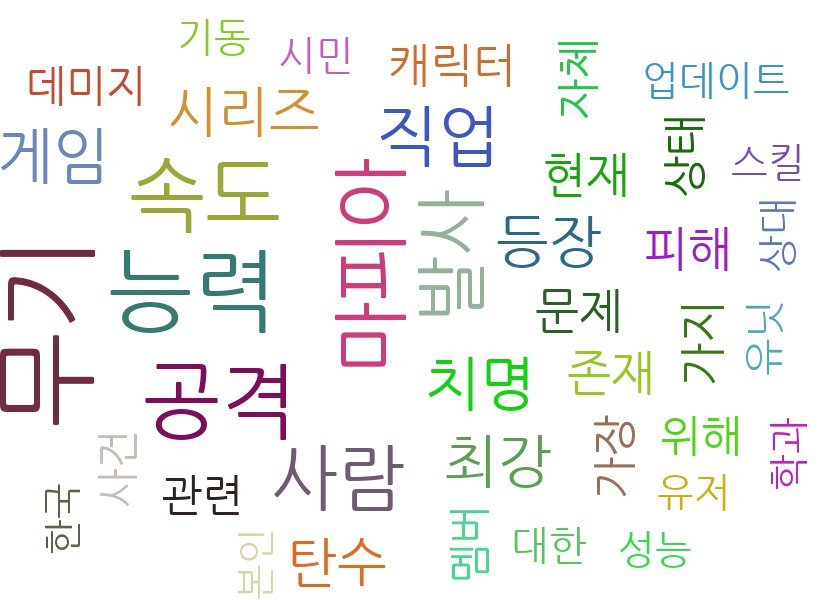

In [18]:
from IPython.display import Image
Image(filename='wordcloud.jpg')

-----

### [나무위키 키워드 시각화]

##### 제목 키워드

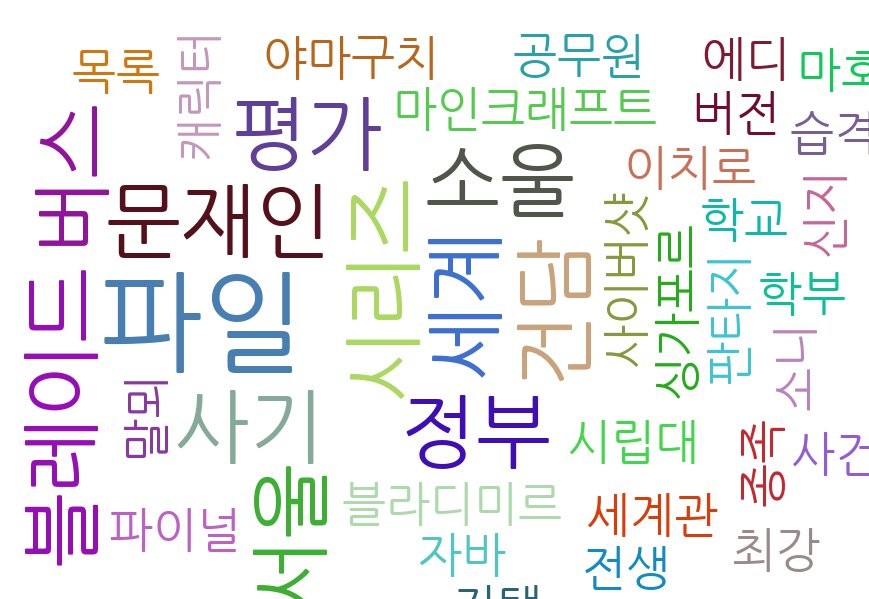

In [19]:
nouns_tagger = Twitter()
nouns = nouns_tagger.nouns(title_corpus)
count = Counter(nouns)

remove_char_counter = Counter({x : count[x] for x in count if len(x) > 1})
remove_char_counter = Counter({x : remove_char_counter[x] for x in count if x not in stopwords})

ranked_tags = remove_char_counter.most_common(40)
taglist = pytagcloud.make_tags(ranked_tags, maxsize=80)
pytagcloud.create_tag_image(taglist, 'title_wordcloud.jpg', size=(900, 600), fontname='NanumGothic', rectangular=False)

Image(filename='title_wordcloud.jpg')

-----

##### 카테고리 키워드

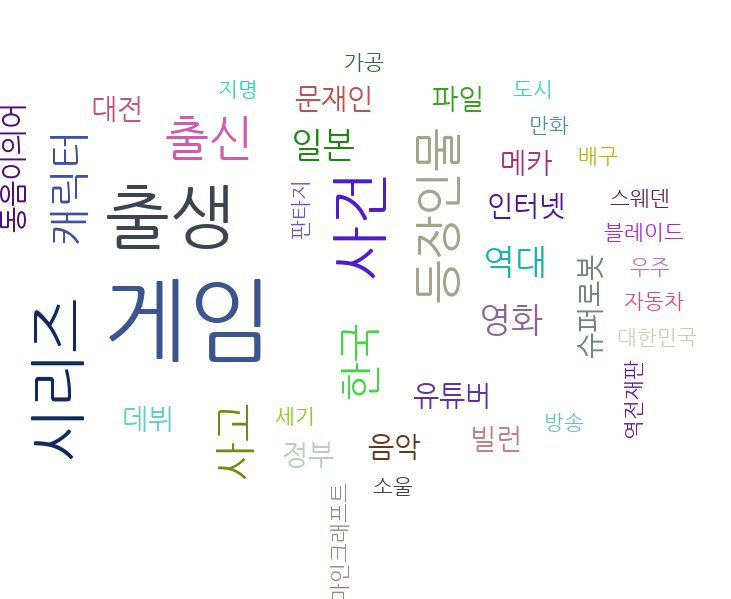

In [20]:
nouns_tagger = Twitter()
nouns = nouns_tagger.nouns(category_corpus)
count = Counter(nouns)

remove_char_counter = Counter({x : count[x] for x in count if len(x) > 1})
remove_char_counter = Counter({x : remove_char_counter[x] for x in count if x not in stopwords})

ranked_tags = remove_char_counter.most_common(40)
taglist = pytagcloud.make_tags(ranked_tags, maxsize=80)
pytagcloud.create_tag_image(taglist, 'category_wordcloud.jpg', size=(900, 600), fontname='NanumGothic', rectangular=False)

Image(filename='category_wordcloud.jpg')